In [8]:
import os
import json
from pymatgen.core import Lattice, Structure, Molecule
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# data
molecule_size = []
unit_cell_size = []
csd_id = []
filelist = np.array(os.listdir("../data"))
for n in filelist:
    csd_id.append(n.split(".")[0])
    with open(os.path.join("../data", n), "r") as f:
        data = json.load(f)
    mol = Molecule.from_dict(data["geometry"]["molecule"])
    struct = Structure.from_dict(data["geometry"]["relaxed_crystal"])
    molecule_size.append(len(mol))
    unit_cell_size.append(len(struct))
molecule_size = np.array(molecule_size)
unit_cell_size = np.array(unit_cell_size)
print(f"Smallest molecule: {min(molecule_size)}")
print(f"Name of smallest molecule: {filelist[np.where(molecule_size == min(molecule_size))[0]]}")
print()
print(f"Largest molecule: {max(molecule_size)}")
print(f"Name of largest molecule: {filelist[np.where(molecule_size == max(molecule_size))[0]]}")
print()
print(f"Smallest unit cell size: {min(unit_cell_size)}")
print(f"Name of smallest unit cell: {filelist[np.where(unit_cell_size == min(unit_cell_size))[0]]}")
print()
print(f"Largest unit cell size: {max(unit_cell_size)}")
print(f"Name of largest unit cell: {filelist[np.where(unit_cell_size == max(unit_cell_size))[0]]}")

Smallest molecule: 12
Name of smallest molecule: ['BENZEN.json']

Largest molecule: 136
Name of largest molecule: ['KECLAH.json' 'TAYSUJ.json' 'VEBJAO.json']

Smallest unit cell size: 44
Name of smallest unit cell: ['BIPHEN.json']

Largest unit cell size: 544
Name of largest unit cell: ['VEBJAO.json']


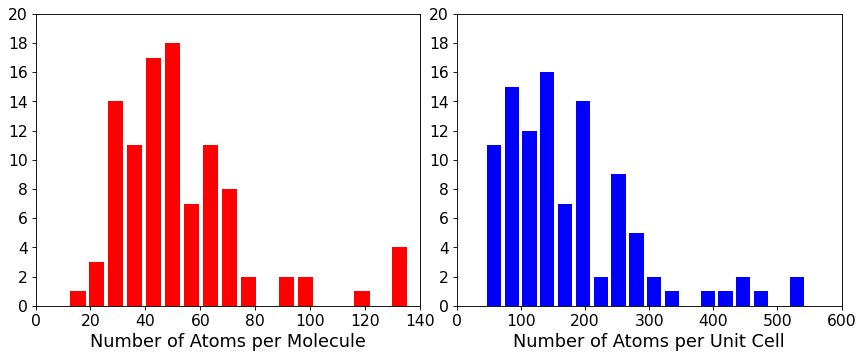

In [73]:
# make the plot
fig = plt.figure(num=None, figsize=(13, 5), dpi=80, facecolor='w', edgecolor='k', frameon=False)
plt.tight_layout()
plt.subplot(121)
plt.hist(molecule_size, bins=18, color="r", rwidth=0.8)
plt.xlabel("Number of Atoms per Molecule", size=16)
plt.xlim([0, 140])
plt.ylim([0, 20])
plt.xticks(size=14)
plt.yticks([i*2 for i in range(11)], [str(i*2) for i in range(11)], size=14)

plt.subplot(122)
plt.hist(unit_cell_size, bins=18, color="b", rwidth=0.8)
plt.xlabel("Number of Atoms per Unit Cell", size=16)
plt.xlim([0, 600])
plt.ylim([0, 20])
plt.xticks(size=14)
plt.yticks([i*2 for i in range(11)], [str(i*2) for i in range(11)], size=14)

plt.subplots_adjust(bottom=0.15, wspace=0.095)
plt.show()

In [74]:
fig.savefig("figure1_distribution.png", dpi=300, bbox_inches='tight', transparent=False)